In [1]:
pip install numpy pandas seaborn matplotlab scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 16.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [7]:
data = pd.read_csv('House Price Prediction Dataset.csv')
data.head()

Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056

NameError: name 'plot' is not defined

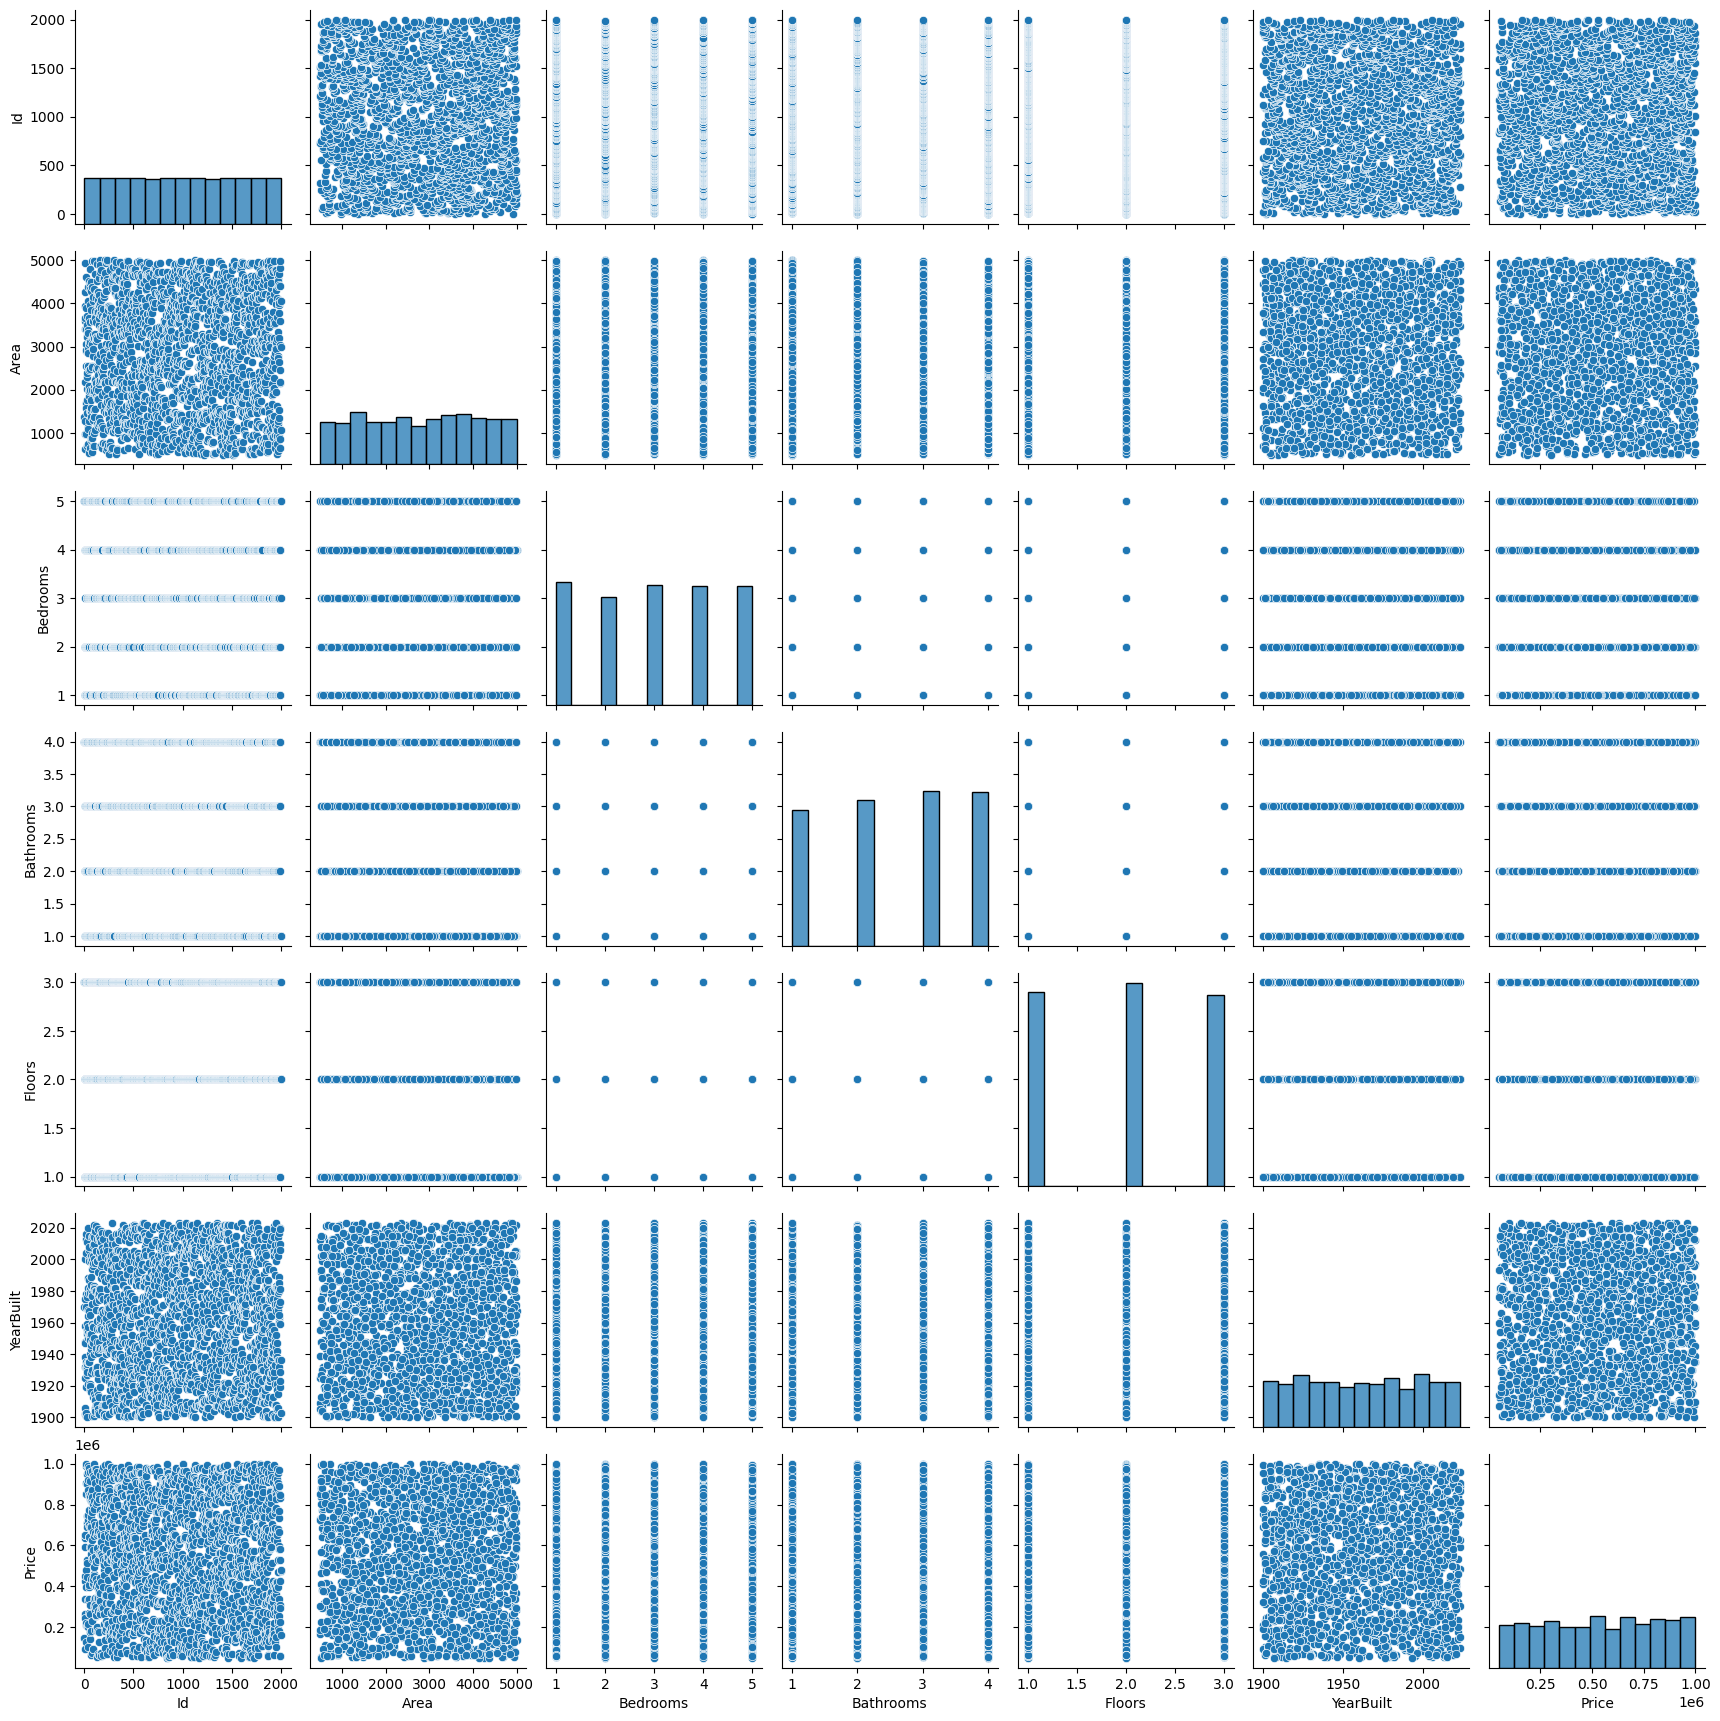

In [10]:
sns.pairplot(data)
plot.show()

In [13]:
X=data[['Area','Bedrooms','Bathrooms','Floors','YearBuilt']]
y=data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr=LinearRegression().fit(X_train,y_train)
dt=DecisionTreeRegressor().fit(X_train,y_train)
kn=KNeighborsRegressor().fit(X_train,y_train)
br=BayesianRidge().fit(X_train,y_train)

In [19]:
lr_pred=lr.predict(X_test)
dt_pred=dt.predict(X_test)
kn_pred=kn.predict(X_test)
br_pred=br.predict(X_test)

In [22]:
def evaluate(y_true,y_pred):
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=sqrt(mse)
    return mae,rmse

In [25]:
print("linear regression")
print(evaluate(y_test,lr_pred))
print("decision tree")
print(evaluate(y_test,dt_pred))
print("knn")
print(evaluate(y_test,kn_pred))
print("bayesian ridge")
print(evaluate(y_test,br_pred))

linear regression
(244587.19991978563, 280695.0729900412)
decision tree
(317501.005, 384268.0409277292)
knn
(254826.3815, 305401.64769004064)
bayesian ridge
(242480.20140022598, 279024.311494729)


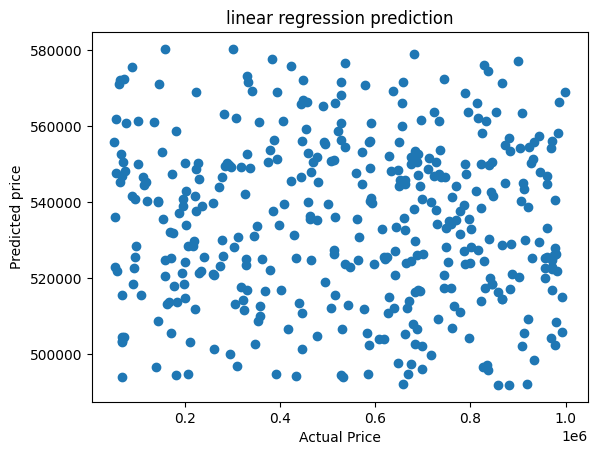

In [37]:
plt.scatter(y_test, lr_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("linear regression prediction")
plt.show()